In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mobilenet

## Import package

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
from pathlib import Path

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

## Data preprocessing

In [ ]:
train_path = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train'
dev_path = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/dev'
test_path = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/test'

In [ ]:
# Lấy danh sách các file trong thư mục train_path và sắp xếp theo thứ tự
image_files = sorted(os.listdir(train_path))
# Tạo danh sách đầy đủ đường dẫn đến ảnh
full_paths = [os.path.join(train_path, file) for file in image_files]

In [ ]:
full_paths

['/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/0',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/1',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/10',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/11',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/12',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/13',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/14',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/15',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/16',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/17',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/train/18',
 '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset

In [ ]:
map_to_id = {
    0 : 0,
    1 : 1,
    2 : 10,
    3 : 11,
    4 : 12,
    5 : 13,
    6 : 14,
    7 : 15,
    8 : 16,
    9 : 17,
    10: 18,
    11: 19,
    12: 2,
    13: 3,
    14: 4,
    15: 5,
    16: 6,
    17: 7,
    18: 8,
    19: 9
}

In [ ]:
label_map = {
    0 : 'Lăng Bác Hồ',
    1 : 'Tràng An Ninh Bình',
    2 : 'Kinh Thành Huế',
    3 : 'Nhà thờ Đức Bà',
    4 : 'Vịnh Hạ Long',
    5 : 'Dinh Độc Lập',
    6 : 'Thánh Địa Mỹ Sơn',
    7 : 'Hồ Gươm',
    8 : 'Bưu điện trung tâm',
    9 : 'Tượng Chúa Giang Tay Vũng Tàu',
    10: 'Cầu vàng bà nà hills',
    11: 'Cột cờ Lũng Cú',
    12: 'Động Phong nha kẻ bàng',
    13: 'Phố Cổ Hội An',
    14: 'thác Bản Giốc',
    15: 'Nhà Thờ Lớn',
    16: 'Chợ Bến thành',
    17: 'Ga Đà Lạt',
    18: 'Chợ Nổi',
    19: 'Gành đá đĩa'
}

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
dev_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_directory(train_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 2076 images belonging to 20 classes.


In [ ]:
dev_images = dev_generator.flow_from_directory(dev_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 259 images belonging to 20 classes.


In [ ]:
test_images = test_generator.flow_from_directory(test_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 266 images belonging to 20 classes.


In [ ]:
model_Mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    weights='imagenet',
)
model_Mobilenet.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (R

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


## Fine-tune Model

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=dev_images,
    batch_size = 32,
    epochs=50,
    steps_per_epoch=train_images.n//train_images.batch_size,
    validation_steps=dev_images.n//dev_images.batch_size,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
64/64 [==============================] - 626s 10s/step - loss: 1.1959 - accuracy: 0.6991 - val_loss: 0.3733 - val_accuracy: 0.8750
Epoch 2/50
64/64 [==============================] - 9s 135ms/step - loss: 0.1934 - accuracy: 0.9491 - val_loss: 0.2207 - val_accuracy: 0.9336
Epoch 3/50
64/64 [==============================] - 9s 144ms/step - loss: 0.0830 - accuracy: 0.9853 - val_loss: 0.2020 - val_accuracy: 0.9375
Epoch 4/50
64/64 [==============================] - 9s 144ms/step - loss: 0.0378 - accuracy: 0.9956 - val_loss: 0.1759 - val_accuracy: 0.9492
Epoch 5/50
64/64 [==============================] - 8s 131ms/step - loss: 0.0200 - accuracy: 0.9990 - val_loss: 0.1763 - val_accuracy: 0.9492
Epoch 6/50
64/64 [==============================] - 9s 144ms/step - loss: 0.0112 - accuracy: 0.9995 - val_loss: 0.1472 - val_accuracy: 0.9609
Epoch 7/50
64/64 [==============================] - 9s 146ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1635 - val_accuracy: 0.9531
Epoch 

## Save weights model

In [ ]:
model.save('/content/drive/MyDrive/Nam3/Machine_Learning/Project/Models/MB_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load weights model

In [ ]:
model.load_weights('/content/drive/MyDrive/Nam3/Machine_Learning/Project/Models/MB_Model.h5')

## Inference

In [ ]:
url = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset/8/img_8_1.jpg'

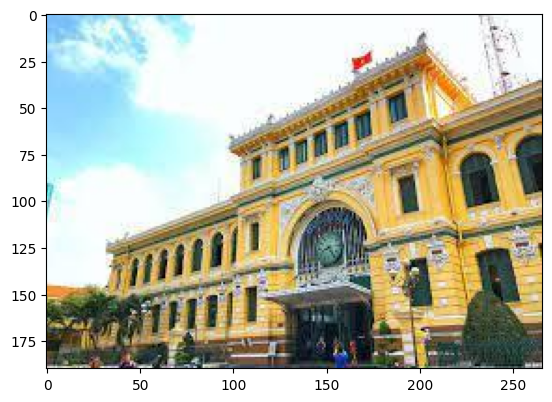

In [ ]:
img = cv2.imread(url)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    label = map_to_id[y_class[0]]
    place = label_map[label]

    return place

In [ ]:
place = output(url)
print(place)

1/1 [==============================] - 2s 2s/step
Bưu điện trung tâm


## Result on test data

In [ ]:
labels = []
for item in os.listdir(train_path):
  labels.append(item)

In [ ]:
def read_data(dir_path):
  image_list = []
  y = []
  for label in labels:
    path = os.path.join(dir_path, label)
    for item in os.listdir(path):
      image_list.append(path + '/' + item)
      y.append(int(label))
  return image_list, y

In [ ]:
X_test, y_test = read_data(test_path)
print(len(X_test))
print(len(y_test))

268
268


In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    label = map_to_id[y_class[0]]

    return label

In [ ]:
y_pred = []
for item in X_test:
  label = output(item)
  y_pred.append(label)

1/1 [==============================] - 0s 21ms/step


In [ ]:
acc = accuracy_score(y_pred, y_test)
print("Accuracy:", acc)
print("Precision:", precision_score(y_pred, y_test, average='macro'))
print("Recall:", recall_score(y_pred, y_test, average='macro'))
print("F1-Score:", f1_score(y_pred, y_test, average='macro'))

Accuracy: 0.9104477611940298
Precision: 0.9087912087912088
Recall: 0.9176062907680554
F1-Score: 0.9061796407322353


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.77      0.71      0.74        14
           2       1.00      0.93      0.96        14
           3       0.79      1.00      0.88        11
           4       1.00      0.88      0.93        16
           5       1.00      1.00      1.00        12
           6       0.93      1.00      0.96        13
           7       1.00      0.93      0.96        14
           8       0.92      0.80      0.86        15
           9       0.85      0.92      0.88        12
          10       1.00      0.87      0.93        15
          11       0.77      0.91      0.83        11
          12       0.92      0.80      0.86        15
          13       0.54      1.00      0.70         7
          14       0.77      1.00      0.87        10
          15       1.00      0.82      0.90        17
          16       0.92      0.92      0.92        13
          17       1.00    

# VGG16

## Import packages

In [ ]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

## Data preprocessing

In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
dev_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_directory(train_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 2076 images belonging to 20 classes.


In [ ]:
dev_images = dev_generator.flow_from_directory(dev_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 259 images belonging to 20 classes.


In [ ]:
test_images = test_generator.flow_from_directory(test_path,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

Found 266 images belonging to 20 classes.


## Fine-tune Model

In [ ]:
model_VGG16 = VGG16(
    input_shape=(224, 224, 3),
    weights='imagenet',
)

In [ ]:
model_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
pretrained_model = VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=dev_images,
    batch_size = 32,
    epochs=50,
    steps_per_epoch=train_images.n//train_images.batch_size,
    validation_steps=dev_images.n//dev_images.batch_size,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
64/64 [==============================] - 17s 247ms/step - loss: 1.5912 - accuracy: 0.5905 - val_loss: 0.6107 - val_accuracy: 0.8398
Epoch 2/50
64/64 [==============================] - 11s 172ms/step - loss: 0.3097 - accuracy: 0.9114 - val_loss: 0.4070 - val_accuracy: 0.8828
Epoch 3/50
64/64 [==============================] - 11s 176ms/step - loss: 0.1231 - accuracy: 0.9662 - val_loss: 0.3763 - val_accuracy: 0.8945
Epoch 4/50
64/64 [==============================] - 11s 170ms/step - loss: 0.0441 - accuracy: 0.9941 - val_loss: 0.3580 - val_accuracy: 0.9102
Epoch 5/50
64/64 [==============================] - 11s 175ms/step - loss: 0.0203 - accuracy: 0.9985 - val_loss: 0.3281 - val_accuracy: 0.9180
Epoch 6/50
64/64 [==============================] - 12s 189ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.3226 - val_accuracy: 0.9258
Epoch 7/50
64/64 [==============================] - 12s 182ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.3438 - val_accuracy: 0.9180

## Save weights Model

In [ ]:
model.save_weights('/content/drive/MyDrive/Nam3/Machine_Learning/Project/Models/VGG16_Model.h5')

## Load weights Model

In [ ]:
model.load_weights('/content/drive/MyDrive/Nam3/Machine_Learning/Project/Models/VGG16_Model.h5')

## Inference

In [ ]:
url = '/content/drive/MyDrive/Nam3/Machine_Learning/Project/Data/Dataset_split/test/19/img_19_109.jpg'

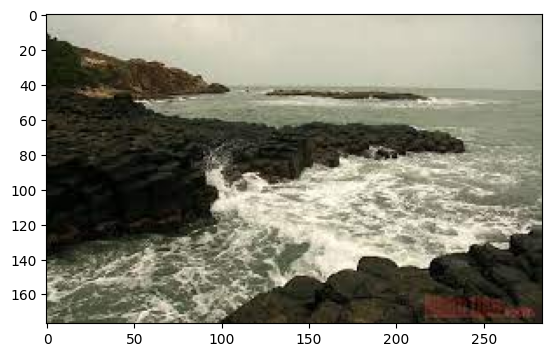

In [ ]:
img = cv2.imread(url)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=np.expand_dims(img,[0])
    img = preprocess_input(img)
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    label = map_to_id[y_class[0]]
    place = label_map[label]

    return place

In [ ]:
place = output(url)
print(place)

1/1 [==============================] - 0s 18ms/step
Gành đá đĩa


## Result on test data

In [ ]:
labels = []
for item in os.listdir(train_path):
  labels.append(item)

In [ ]:
def read_data(dir_path):
  image_list = []
  y = []
  for label in labels:
    path = os.path.join(dir_path, label)
    for item in os.listdir(path):
      image_list.append(path + '/' + item)
      y.append(int(label))
  return image_list, y

In [ ]:
X_test, y_test = read_data(test_path)
print(len(X_test))
print(len(y_test))

268
268


In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=np.expand_dims(img,[0])
    img = preprocess_input(img)
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    label = map_to_id[y_class[0]]

    return label

In [ ]:
y_pred = []
for item in X_test:
  label = output(item)
  y_pred.append(label)

1/1 [==============================] - 0s 20ms/step


In [ ]:
acc = accuracy_score(y_pred, y_test)
print("Accuracy:", acc)
print("Precision:", precision_score(y_pred, y_test, average='macro'))
print("Recall:", recall_score(y_pred, y_test, average='macro'))
print("F1-Score:", f1_score(y_pred, y_test, average='macro'))

Accuracy: 0.9402985074626866
Precision: 0.9398351648351648
Recall: 0.9475557081807082
F1-Score: 0.9399271555434613


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.92      0.75      0.83        16
           2       1.00      1.00      1.00        13
           3       0.93      0.93      0.93        14
           4       0.86      1.00      0.92        12
           5       1.00      0.80      0.89        15
           6       0.86      1.00      0.92        12
           7       1.00      0.87      0.93        15
           8       0.92      1.00      0.96        12
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        13
          11       0.92      1.00      0.96        12
          12       0.92      0.92      0.92        13
          13       0.69      1.00      0.82         9
          14       0.92      1.00      0.96        12
          15       1.00      0.93      0.97        15
          16       1.00      1.00      1.00        13
          17       0.92    